In [1]:
import os
import sys
import pprint as pp
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# set the main directory to import qel instruments drivers
sys.path.append(os.getcwd().replace('\\documents\\measure_notebooks\\Two_Transmon_MAP_gate_sequence',''))
from instruments.Tektronix_AWG5208.TektronixAWG_core_v2 import AWG5208

In [ ]:
# connect to AWG
awg = AWG5208(inst_visaAddress='TCPIP0::192.168.20.43::inst0::INSTR')
# help(awg)
# set sampling rate and reference clock
awg.set_sample_rate(sample_rate=1.0E9)
awg.set_extref_source(ref_freq=10E6)

plot size=[20,3]


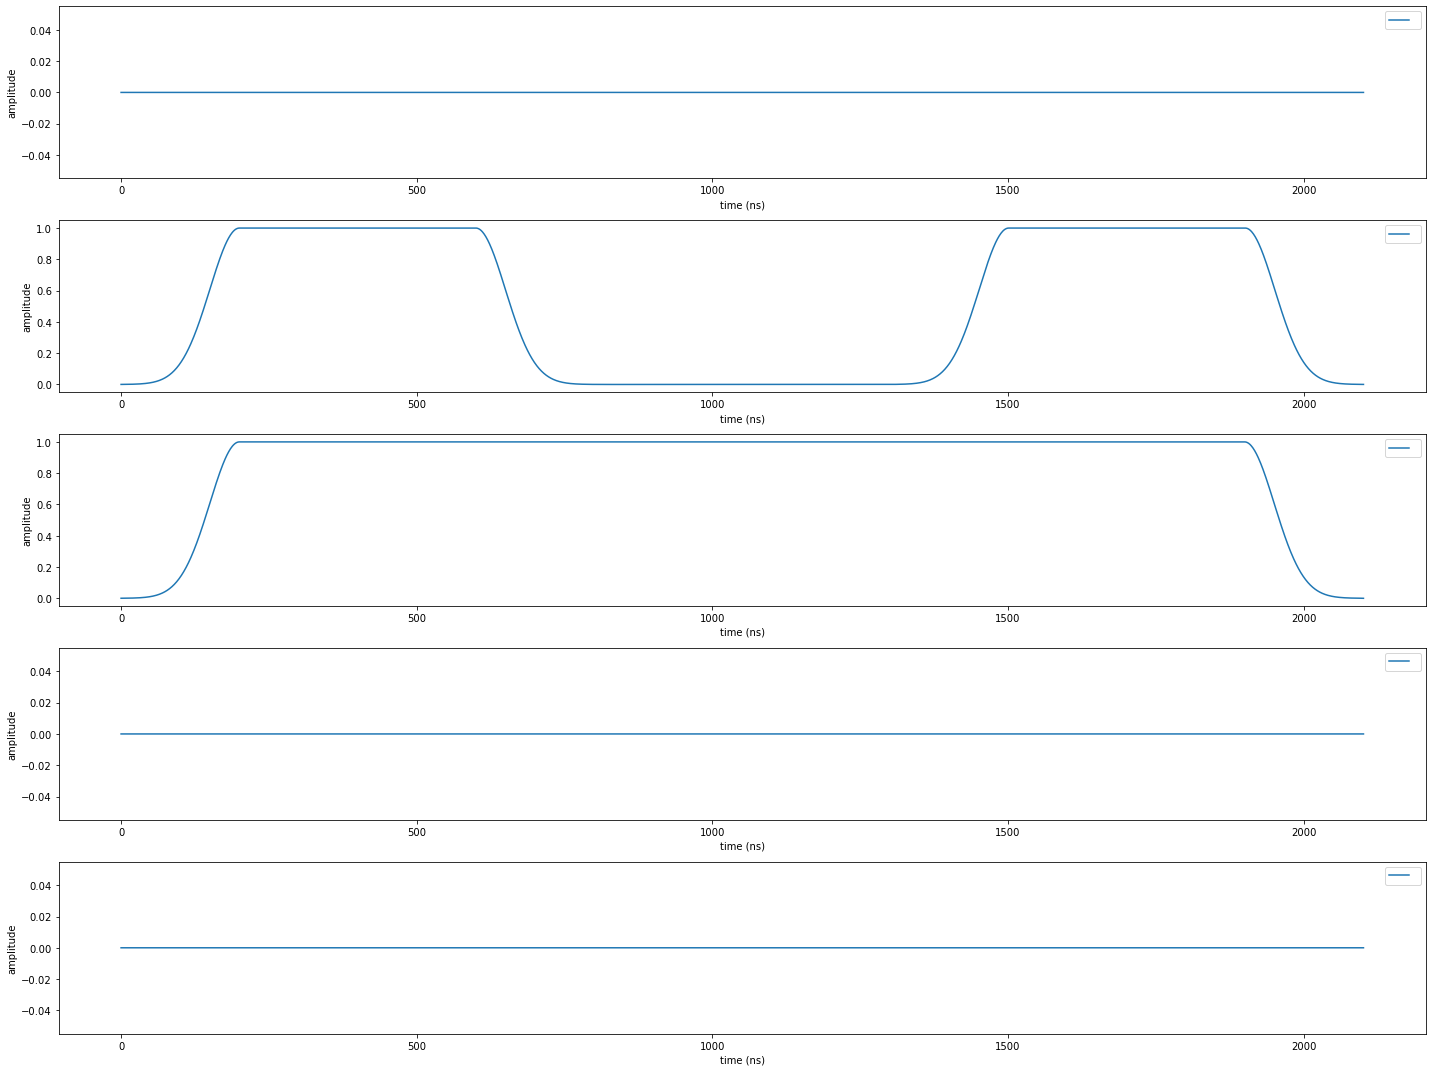

2102


"\n# clear, set, and upload\nawg.clr_wfm()\n\nawg.set_wfm(wfm_name=f'{ChannelList[0]}', wfm=(output.y[0])\n    \nawg.set_wfm(wfm_name=f'{ChannelList[0]}', wfm=(output.y[1])\n    \nawg.set_wfm(wfm_name=f'{ChannelList[0]}', wfm=(output.y[2])\n    \nawg.set_wfm(wfm_name=f'{ChannelList[3]}', wfm=(output.y[3],mkr1=output.y[4])\n    \nawg.upload_wfm()\n"

In [13]:
# assign waveforms
from WaveForm_Editor import *
from WavetoolsV6 import Wave

sampling_rate = 1e9
gen_wfm_amount = 10 

ChannelList = ['Q1', 'Q2', 'AC_Stark','ReadOut']

a = Wave(NullPulse,[100])  

b = Wave(GaussianPulse,[50,400])

c = Wave(GaussianPulse,[50,1700])

d = Wave(NullPulse,[500])
      
e = Wave(GaussianPulse,[30,300])

f = Wave(GaussianPulse,[10,10])

m = Wave(SquarePulse,[100])


qb1 = ~a

qb2 = ~b + ~d + ~b 

AC_Stark = ~c 

readout = ~e

mkr = ~m
#mkr = ~f

Null = ~a 





gate = ~qb1 / ~qb2 / ~AC_Stark / ~Null/ ~Null

ReadOut = ~Null / ~Null/ ~Null / ~readout / ~mkr

#output = gate + ReadOut
output = gate

output.plot(size=[20,3])

print(len(output.y[0]))
"""
# clear, set, and upload
awg.clr_wfm()

awg.set_wfm(wfm_name=f'{ChannelList[0]}', wfm=(output.y[0])
    
awg.set_wfm(wfm_name=f'{ChannelList[0]}', wfm=(output.y[1])
    
awg.set_wfm(wfm_name=f'{ChannelList[0]}', wfm=(output.y[2])
    
awg.set_wfm(wfm_name=f'{ChannelList[3]}', wfm=(output.y[3],mkr1=output.y[4])
    
awg.upload_wfm()
"""

In [ ]:
"""
# assign waveform to corresponding sequence position one at a time
seq_name='MAP_gate'
trackList = ChannelList

# clear, set, assign and upload

awg.clr_seq()
awg.set_seq(seq_name, num_track=len(trackList), num_step=gen_wfm_amount)
for track_idx, track in enumerate(trackList):
    for step_idx, freq in enumerate(freq_range):
        awg.assign_seq(f'{track}_{freq}', seq_name, track_idx+1, step_idx+1)
awg.upload_seq(seq_name)
"""

In [ ]:
# assign waveforms/sequences to channels
#awg.assign_ch(1, 'MAP_gate', track_index=1)
#awg.assign_ch(2, 'MAP_gate', track_index=2)# for sequence 
awg.assign_ch(1, f'{ChannelList[0]}', auto_output=False, auto_mkr=False)
awg.assign_ch(2, f'{ChannelList[1]}', auto_output=False, auto_mkr=False)
awg.assign_ch(3, f'{ChannelList[2]}', auto_output=False, auto_mkr=False)
awg.assign_ch(4, f'{ChannelList[3]}', auto_output=False, auto_mkr=True)
#awg.assign_ch(5, 'Q_1000000.0', auto_output=False, auto_mkr=False)# for waveform

In [ ]:
# set channel amplitudes
awg.set_ch_amp(ch=1, wfm_Vpp=1.0, wfm_offset=0., mkr1=1.0, mkr2=1.0, mkr3=1.0, mkr4=1.0)
awg.set_ch_amp(ch=2, wfm_Vpp=1.0, wfm_offset=0., mkr1=1.0, mkr2=1.0, mkr3=1.0, mkr4=1.0)
awg.set_ch_amp(ch=3, wfm_Vpp=1.0, wfm_offset=0., mkr1=1.0, mkr2=1.0, mkr3=1.0, mkr4=1.0)
awg.set_ch_amp(ch=4, wfm_Vpp=1.0, wfm_offset=0., mkr1=1.0, mkr2=1.0, mkr3=1.0, mkr4=1.0)
awg.set_ch_amp(ch=5, wfm_Vpp=1.0, wfm_offset=0., mkr1=1.0, mkr2=1.0, mkr3=1.0, mkr4=1.0)

In [ ]:
print(awg)
# del awg